In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

In [2]:
df = pd.read_csv("uk_econcomic.csv")

6.	Merchandise imports and exports of UK. Have an eye on the y-axis. Imports for agriculture, food and fuel are more than exports. Manufacturing and ores exports are more than imports.
7.	Commercial service: Insurance and Computer import is higher than exports but travel and transport services import is higher than exports. Both 5 and 6 means that poor and people not living in urban area were more hit.
9.	Youth unemployment : most affected with 2004 starting unlike just around recession. Check for other countries
10.	Part time employment for females is twice as much as for males. No need for labour participation
11. School --see how the education has changed???


In [3]:
df.columns

Index(['Unnamed: 0', 'Year', 'GDP (current US$)', 'GDP per capita (current US$)', 'GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)', 'Consumer price index (2010 = 100)', 'Tax revenue (% of GDP)', 'Rural population',
       'Rural population (% of total population)', 'Rural population growth (annual %)', 'Urban population', 'Urban population (% of total)',
       'Urban population growth (annual %)', 'Employment to population ratio, 15+, female (%) (national estimate)',
       'Employment to population ratio, 15+, male (%) (national estimate)', 'Employment to population ratio, 15+, total (%) (national estimate)',
       'Employment to population ratio, ages 15-24, female (%) (national estimate)', 'Employment to population ratio, ages 15-24, male (%) (national estimate)',
       'Employment to population ratio, ages 15-24, total (%) (national estimate)', 'Ratio of female to male labor force participation rate (%) (national estimate)'

In [4]:
dfs = df[['School enrollment, primary (% gross)','School enrollment, secondary (% gross)','School enrollment, tertiary (% gross)']]

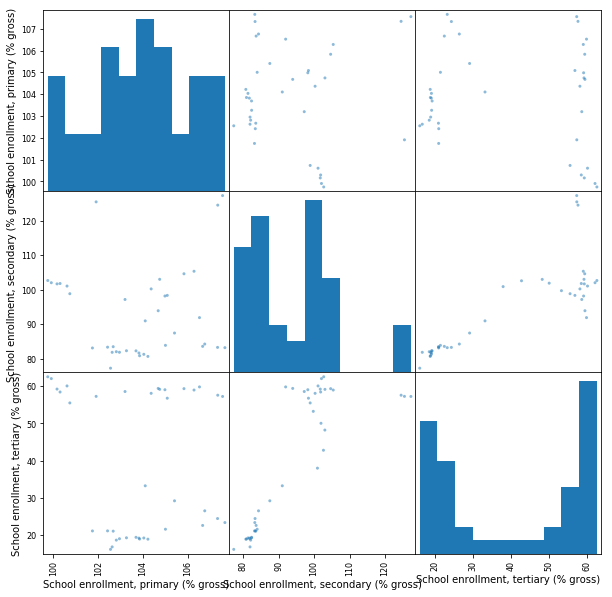

In [5]:
pd.scatter_matrix(dfs, figsize=(10, 10))
plt.show()

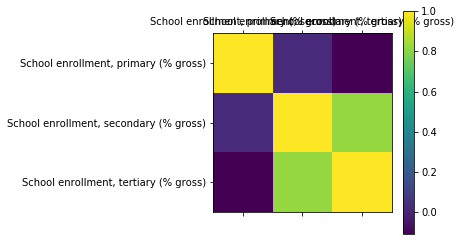

In [6]:
plt.matshow(dfs.corr())
plt.xticks(range(len(dfs.columns)), dfs.columns)
plt.yticks(range(len(dfs.columns)), dfs.columns)
plt.colorbar()
plt.show()


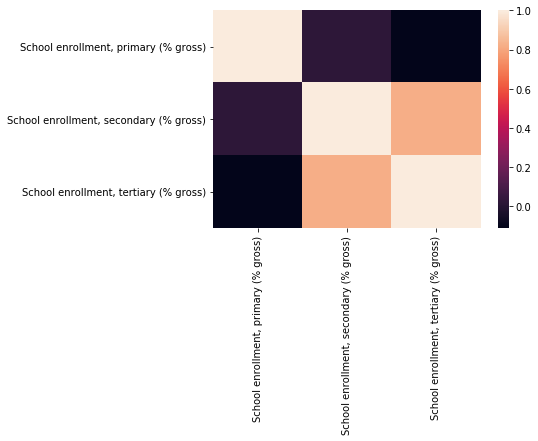

In [7]:
import seaborn as sns
corr = dfs.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

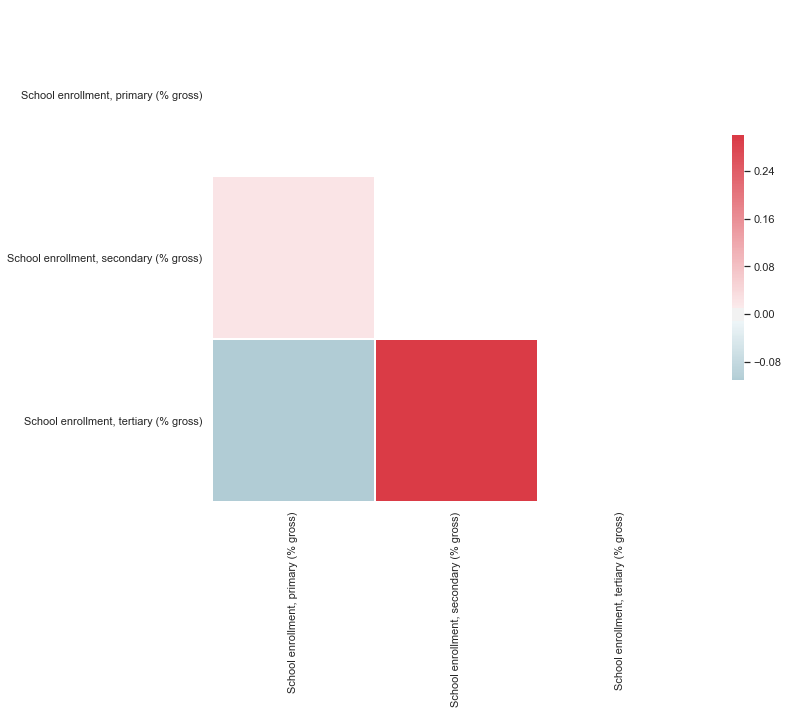

In [8]:
sns.set(style="white")

# Compute the correlation matrix
corr = dfs.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
#! pip install joypy

In [10]:
style.available

NameError: name 'style' is not defined

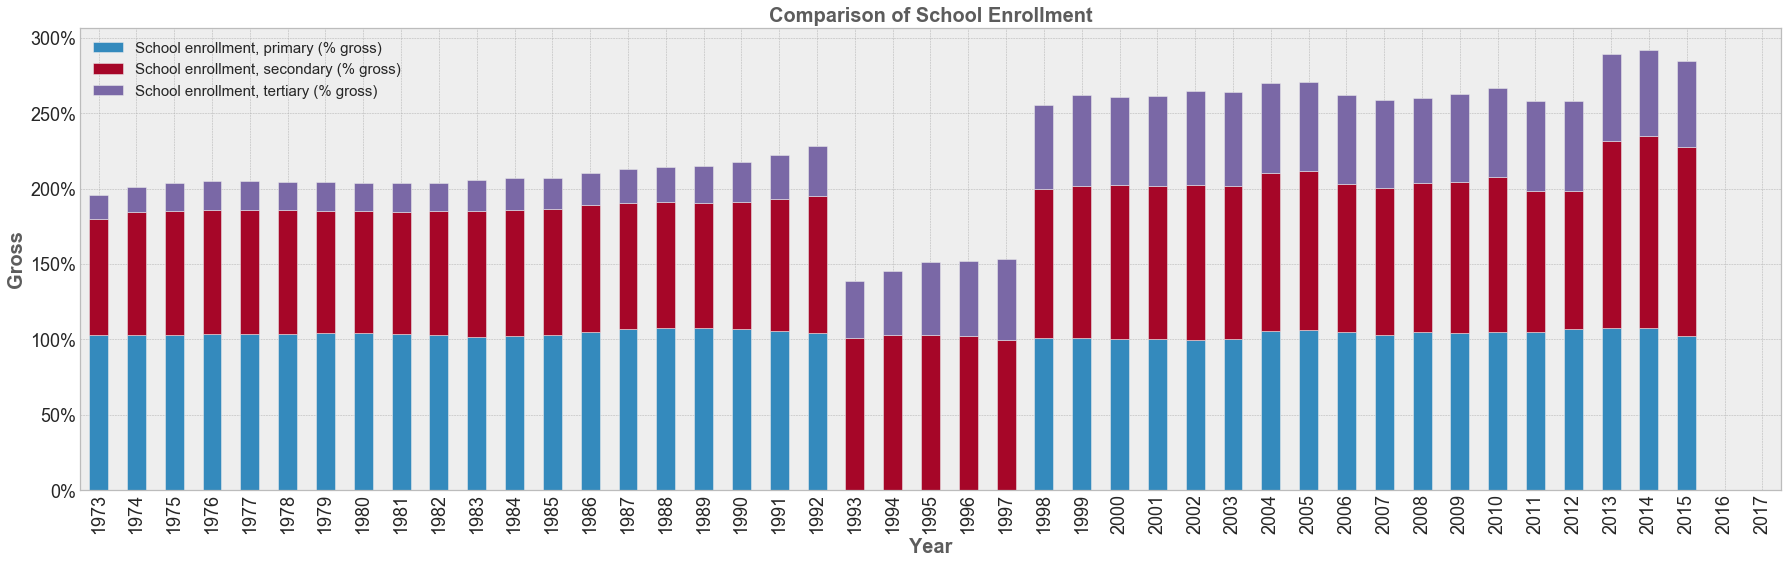

In [11]:
import matplotlib.style as style
style.use('bmh')
sns.despine()
fte_graph = df.plot.bar(x = 'Year', y = ['School enrollment, primary (% gross)','School enrollment, secondary (% gross)','School enrollment, tertiary (% gross)'],stacked=True, figsize = (25,8))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 

# Adding a title and a subtitle

plt.title("Comparison of School Enrollment",fontsize = 20, weight = 'bold', alpha = .75)
# add cool legend
fte_graph.legend(
    fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
fte_graph.set_xlabel('Year',fontsize = 20, weight = 'bold', alpha = .75)
fte_graph.set_ylabel('Gross',fontsize = 20, weight = 'bold', alpha = .75)

fte_graph.legend(frameon=False, loc='upper left',fontsize= 15)
fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

plt.tight_layout()
plt.savefig("schoolcomparison.png")

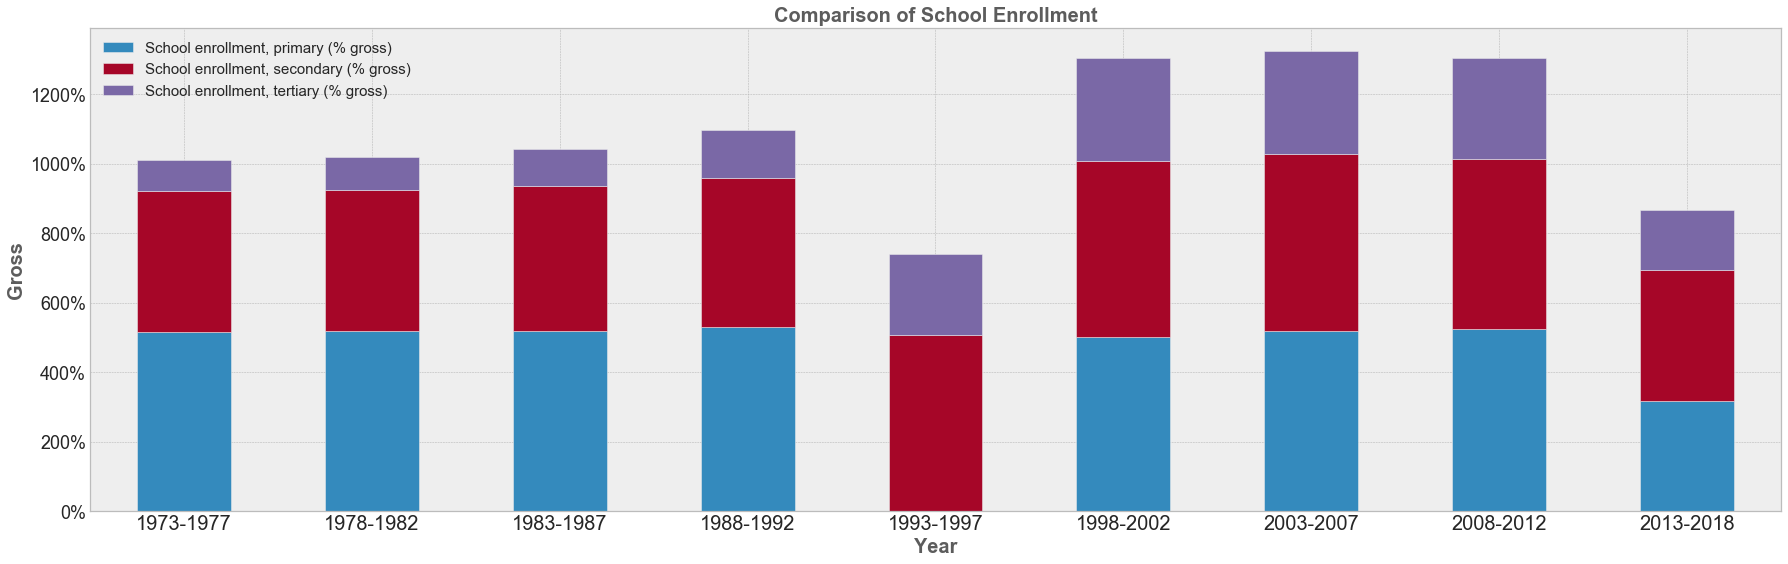

In [60]:
bins = [1973,1978,1983,1988,1993,1998,2003,2008,2013,2018]
s = df[['School enrollment, primary (% gross)','School enrollment, secondary (% gross)','School enrollment, tertiary (% gross)']]
#s.set_index(['1973-1977','1978-1982','1983-1987','1988-1992','1993-1997','1998-2002','2003-2007','2008-2012','2013-2018'], inplace = True)
s = s.groupby(s.index // 5 * 5).sum()
s.index = ['1973-1977','1978-1982','1983-1987','1988-1992','1993-1997','1998-2002','2003-2007','2008-2012','2013-2018']
s = s.reset_index()
sns.despine()
fte_graph = s.plot.bar(x = 'index', y = ['School enrollment, primary (% gross)','School enrollment, secondary (% gross)','School enrollment, tertiary (% gross)'],stacked=True, figsize = (25,8))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 

# Adding a title and a subtitle

plt.title("Comparison of School Enrollment",fontsize = 20, weight = 'bold', alpha = .75)
# add cool legend
fte_graph.legend(
    fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
fte_graph.set_xlabel('Year',fontsize = 20, weight = 'bold', alpha = .75)
fte_graph.set_ylabel('Gross',fontsize = 20, weight = 'bold', alpha = .75)
plt.xticks(rotation='horizontal',fontsize= 20)
# Pad margins so that markers don't get clipped by the axes
plt.margins()
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
fte_graph.legend(frameon=False, loc='upper left',fontsize= 15)
fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

plt.tight_layout()

In [81]:
s = df[['School enrollment, primary (% gross)','School enrollment, secondary (% gross)','School enrollment, tertiary (% gross)']]
#s.set_index(['1973-1977','1978-1982','1983-1987','1988-1992','1993-1997','1998-2002','2003-2007','2008-2012','2013-2018'], inplace = True)
s = s.groupby(s.index // 4 * 4).sum()
s.head(11)

,"School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)"
0,411.252785,323.654678,70.587667
4,415.773178,326.077637,76.409830
8,410.966469,329.368027,79.906740
12,422.005165,334.321274,88.314602
16,423.607872,346.126152,113.208582
20,NaN,408.516724,178.999302
24,301.641640,401.563812,227.357048
28,405.651291,411.142693,243.272991
32,419.552521,399.202797,233.474991
36,420.323067,389.222168,236.571701


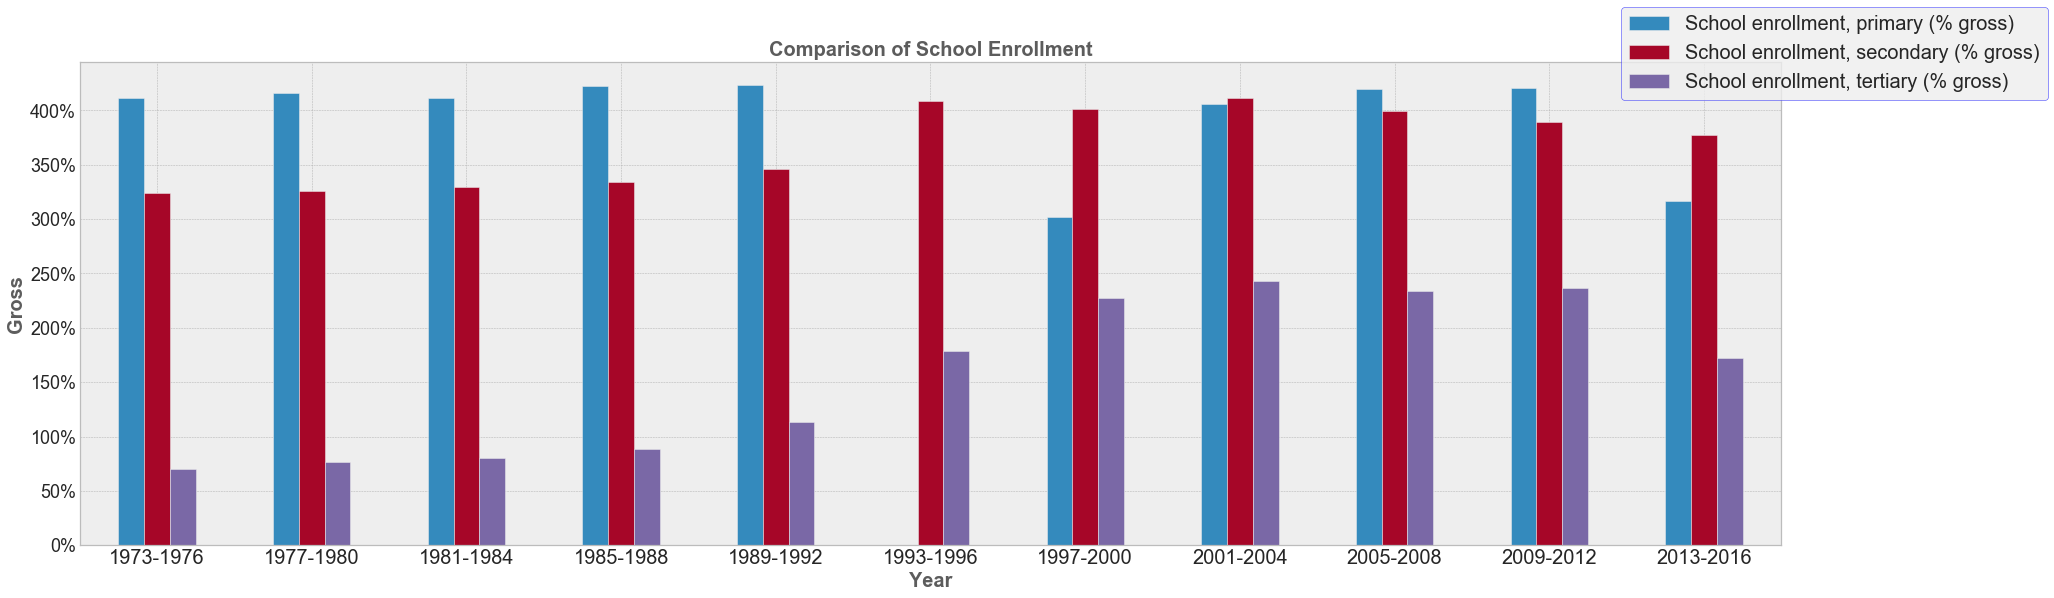

In [85]:

s = df[['School enrollment, primary (% gross)','School enrollment, secondary (% gross)','School enrollment, tertiary (% gross)']]
#s.set_index(['1973-1977','1978-1982','1983-1987','1988-1992','1993-1997','1998-2002','2003-2007','2008-2012','2013-2018'], inplace = True)
s = s.groupby(s.index // 4 * 4).sum().head(11)
s.index = ['1973-1976','1977-1980','1981-1984','1985-1988','1989-1992','1993-1996','1997-2000','2001-2004','2005-2008','2009-2012','2013-2016']
s = s.reset_index()
sns.despine()
fte_graph = s.plot.bar(x = 'index', y = ['School enrollment, primary (% gross)','School enrollment, secondary (% gross)','School enrollment, tertiary (% gross)'],stacked=False, figsize = (25,8))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 

# Adding a title and a subtitle

plt.title("Comparison of School Enrollment",fontsize = 20, weight = 'bold', alpha = .75)
# add cool legend
fte_graph.legend(
    fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
fte_graph.set_xlabel('Year',fontsize = 20, weight = 'bold', alpha = .75)
fte_graph.set_ylabel('Gross',fontsize = 20, weight = 'bold', alpha = .75)
plt.xticks(rotation='horizontal',fontsize= 20)
# Pad margins so that markers don't get clipped by the axes
plt.margins()
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
fte_graph.legend( fontsize= 20,bbox_to_anchor=(0.90, .90), frameon=True).get_frame().set_edgecolor('blue')
fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

plt.tight_layout()
plt.savefig("school_enrollment.png", bbox_inches="tight");

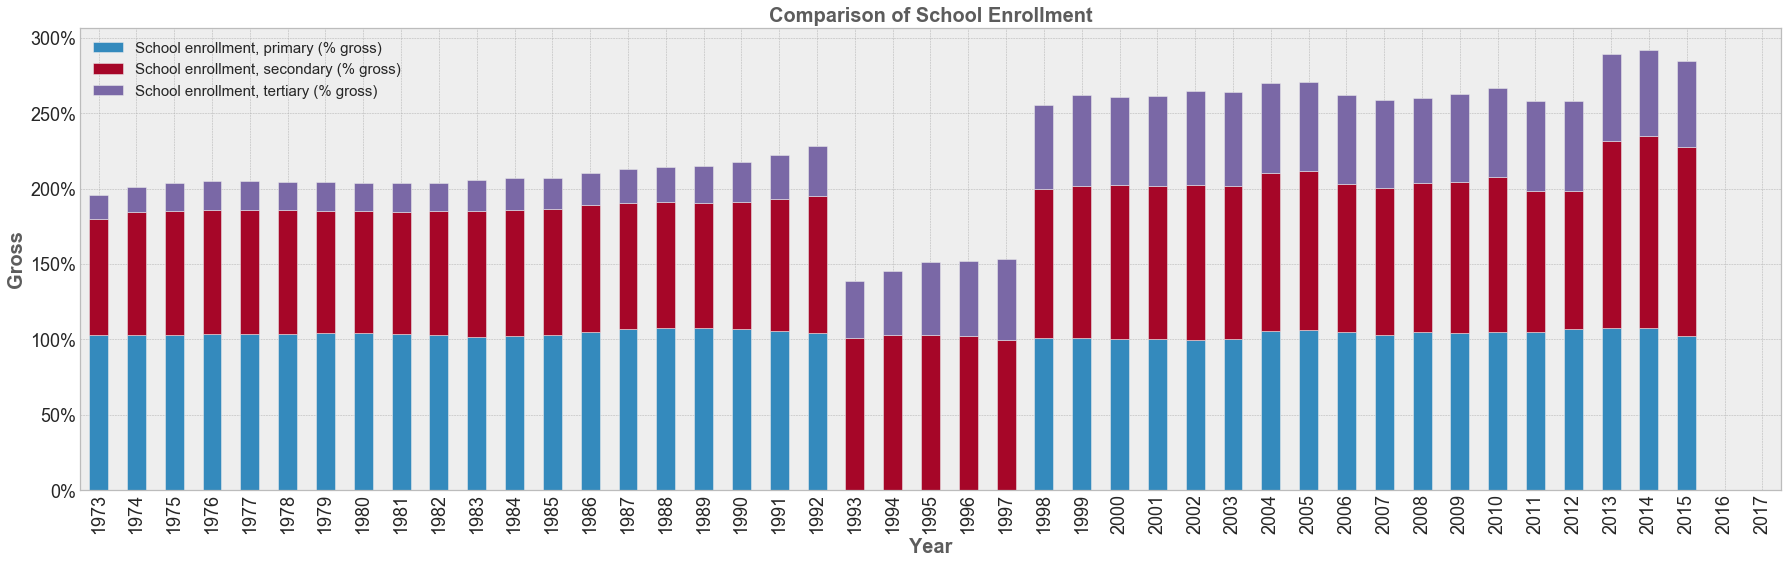

In [11]:
import matplotlib.style as style
style.use('bmh')
sns.despine()
fte_graph = df.plot.bar(x = 'Year', y = ['School enrollment, primary (% gross)','School enrollment, secondary (% gross)','School enrollment, tertiary (% gross)'],stacked=True, figsize = (25,8))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 

# Adding a title and a subtitle

plt.title("Comparison of School Enrollment",fontsize = 20, weight = 'bold', alpha = .75)
# add cool legend
fte_graph.legend(
    fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
fte_graph.set_xlabel('Year',fontsize = 20, weight = 'bold', alpha = .75)
fte_graph.set_ylabel('Gross',fontsize = 20, weight = 'bold', alpha = .75)

fte_graph.legend(frameon=False, loc='upper left',fontsize= 15)
fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

plt.tight_layout()
plt.savefig("schoolcomparison.png")

In [139]:
dfu = df[['Year','Unemployment, youth female (% of female labor force ages 15-24) (national estimate)',
       'Unemployment, youth male (% of male labor force ages 15-24) (national estimate)',
       'Unemployment, youth total (% of total labor force ages 15-24) (national estimate)']][10:]


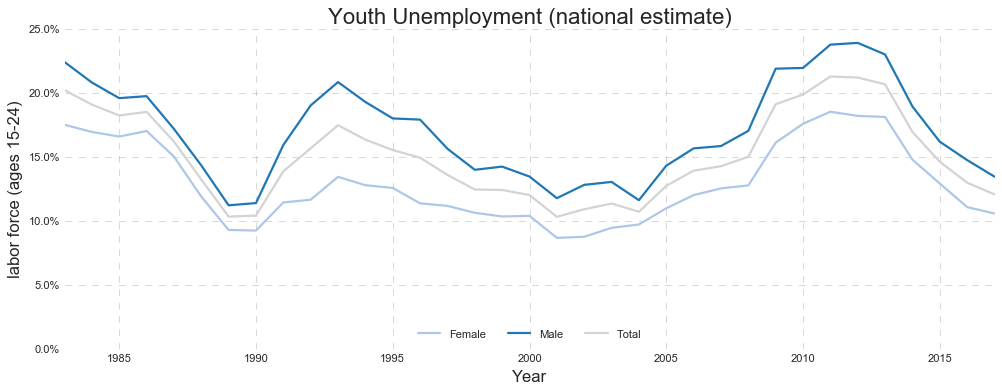

In [188]:
style.use('seaborn-white')
   
fte_graph = dfu.plot(x = 'Year'[:10], y = ['Unemployment, youth female (% of female labor force ages 15-24) (national estimate)',
       'Unemployment, youth male (% of male labor force ages 15-24) (national estimate)',
       'Unemployment, youth total (% of total labor force ages 15-24) (national estimate)'], figsize = (15,5),color =['#aec7e8','#1f77b4', '#D3D3D3'])


fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 
fte_graph.set_ylim(0,25)
# Generate a bolded horizontal line at y = 0 

fte_graph.get_xaxis().get_major_formatter().set_useOffset(False)
# Add an extra vertical line by tweaking the range of the x-axis
#fte_graph.set_xlim(left = 1, right = 2017)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

# Remove the plot frame lines. They are unnecessary here.
fte_graph.spines['top'].set_visible(False)
fte_graph.spines['bottom'].set_visible(False)
fte_graph.spines['right'].set_visible(False)
fte_graph.spines['left'].set_visible(False)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted.
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

plt.title('Youth Unemployment (national estimate)', fontsize= 20)
plt.xlabel('Year', fontsize= 15)
plt.xticks(fontsize=10)
plt.ylabel('labor force (ages 15-24)', fontsize= 15)
plt.yticks(fontsize=10)
fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{}%'.format))
#skip every one x-tick for cleanliness

fte_graph.legend(labels=["Female","Male",'Total'],frameon=False, loc='lower center',ncol= 3,fontsize= 10)
plt.savefig("youthunemployment.png")

In [179]:
dfp = df[['Year', 'Part time employment, female (% of total female employment)', 'Part time employment, male (% of total male employment)',
       'Part time employment, total (% of total employment)']][10:]

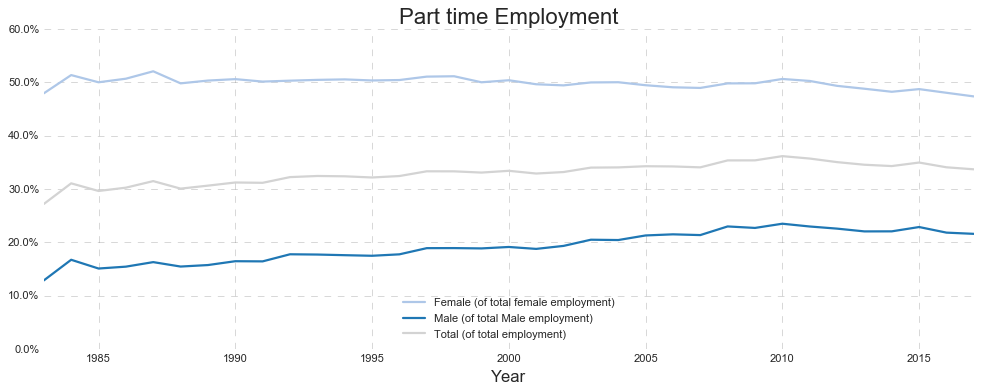

In [195]:
style.use('seaborn-white')
fte_graph = dfp.plot(x = 'Year', y = ['Part time employment, female (% of total female employment)', 'Part time employment, male (% of total male employment)',
       'Part time employment, total (% of total employment)'], figsize = (15,5),color =['#aec7e8','#1f77b4', '#D3D3D3'])

fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Customizing the tick labels of the y-axis 
fte_graph.set_ylim(0,60)
# Generate a bolded horizontal line at y = 0 

fte_graph.get_xaxis().get_major_formatter().set_useOffset(False)
# Add an extra vertical line by tweaking the range of the x-axis
#fte_graph.set_xlim(left = 1, right = 2017)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

# Remove the plot frame lines. They are unnecessary here.
fte_graph.spines['top'].set_visible(False)
fte_graph.spines['bottom'].set_visible(False)
fte_graph.spines['right'].set_visible(False)
fte_graph.spines['left'].set_visible(False)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted.
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

plt.title('Part time Employment', fontsize= 20)
plt.xlabel('Year', fontsize= 15)
plt.xticks(fontsize=10)
#plt.ylabel('employment', fontsize= 15)
plt.yticks(fontsize=10)
fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{}%'.format))
#skip every one x-tick for cleanliness

fte_graph.legend(labels=["Female (of total female employment)","Male (of total Male employment)","Total (of total employment)"],frameon=False, loc='lower center',fontsize= 10)
plt.savefig("parttimeemployment.png")

https://stackoverflow.com/questions/48225888/matplotlib-finance-candlestick-ohlc-plot-intraday-1min-bar-data-with-time-breaks

https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

https://realpython.com/python-histograms/

